In [1]:
import pickle
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, LancasterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer

from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

%matplotlib inline

# Data Exploration

In [2]:
data = pd.read_excel("Input/Canva_reviews.xlsx")

In [3]:
data.shape

(1500, 13)

In [4]:
data.head(3)

,reviewId,userName,userImage,review,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,Sentiment,Sub Category,Sub Category_test
0,gp:AOqpTOFxf3fttcT5DSvFIn9KPp5FErgH9yC533Fmoxv...,Donna Caritero,https://play-lh.googleusercontent.com/a-/AOh14...,Overall it's really an amazing app. I've been ...,4,528,2.116.0,2021-06-17 07:18:54,Hi Donna. We are sorry that your text or desig...,2021-06-19 21:24:32,Negative,NaN,bug_picture_quality
1,gp:AOqpTOEq6rNIWLnPV4KFTctWvm0mpGEQljtD6mvy1H-...,Soumi Mukhopadhyay,https://play-lh.googleusercontent.com/a-/AOh14...,Hey! Yes I gave a 5 star rating... coz I belie...,5,351,2.116.0,2021-06-17 19:18:28,NaN,NaT,Positive,extremely_happy,NaN
2,gp:AOqpTOE86hSyPRHZgYt28Uk5zGe4FZGb1hkmtFDiYJ2...,Theknown _unknown,https://play-lh.googleusercontent.com/a-/AOh14...,Canva used to be a good app! But recently I've...,1,160,2.116.0,2021-06-23 19:13:28,Hi there. We're sorry to hear that you are hav...,2021-06-26 20:20:56,Negative,saving_downloading_issue,bug_saving_files


In [5]:
data.loc[13, "review"]

'Unable to save my work. Nothing works :('

In [6]:
data.loc[13, "Sentiment"]

'Negative'

In [7]:
data.loc[1495, "review"]

'Absolutely amazing and a lifesaver for teachers.'

In [8]:
data.loc[1495, "Sentiment"]

'Positive'

### Bar plot of 'Sentiment'

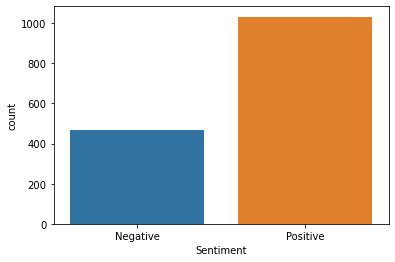

In [9]:
sns.countplot(x="Sentiment", data=data)
plt.show()

In [10]:
data["Sentiment"].value_counts()

Positive    1032
Negative     468
Name: Sentiment, dtype: int64

In [11]:
468/(1032+468)

0.312

### Bar plot of 'score'

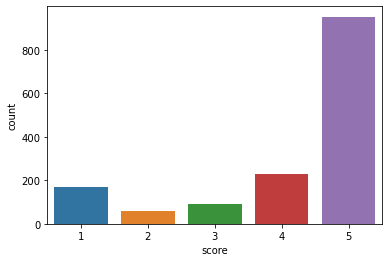

In [12]:
sns.countplot(x="score", data=data)
plt.show()

### Check relationship between 'score' and 'Sentiment'

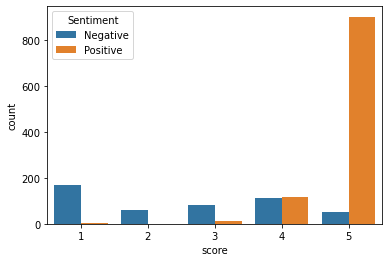

In [13]:
sns.countplot(x="score", data=data, hue="Sentiment")
plt.show()

### Find the length of each 'review'

In [14]:
data["len"] = data["review"].apply(len)

In [15]:
data["len"].describe()

count    1500.000000
mean       86.468667
std        55.681355
min        20.000000
25%        54.000000
50%        75.000000
75%       102.000000
max       498.000000
Name: len, dtype: float64

### Plot the histogram of 'len'

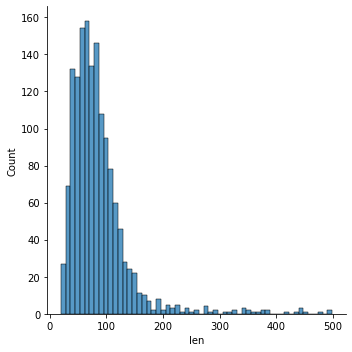

In [16]:
sns.displot(data["len"])
plt.show()

### Plot the distribution of 'len' for different 'Sentiment' types

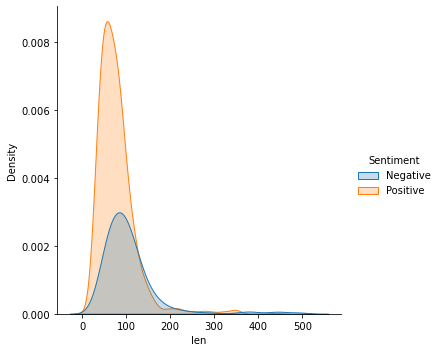

In [17]:
sns.displot(data=data, x="len", hue="Sentiment", kind="kde", fill=True)
plt.show()

# Tokenization

In [18]:
data = data[["review", "Sentiment"]]

In [19]:
data.loc[13, "review"]

'Unable to save my work. Nothing works :('

In [20]:
sent_tokenize(data.loc[13,"review"])

['Unable to save my work.', 'Nothing works :(']

In [21]:
data.loc[1495, "review"]

'Absolutely amazing and a lifesaver for teachers.'

In [22]:
sent_tokenize(data.loc[1495, "review"])

['Absolutely amazing and a lifesaver for teachers.']

In [23]:
word_tokenize(data.loc[13, "review"])

['Unable', 'to', 'save', 'my', 'work', '.', 'Nothing', 'works', ':', '(']

In [24]:
word_tokenize(data.loc[1495, "review"])

['Absolutely', 'amazing', 'and', 'a', 'lifesaver', 'for', 'teachers', '.']

### Convert text to lower case

In [25]:
reviews = list(data["review"])

In [26]:
len(reviews)

1500

In [27]:
reviews[13]

'Unable to save my work. Nothing works :('

In [28]:
reviews[1495]

'Absolutely amazing and a lifesaver for teachers.'

In [29]:
reviews[1495].lower()

'absolutely amazing and a lifesaver for teachers.'

In [30]:
reviews_lower = [r.lower() for r in reviews]

In [31]:
reviews_lower[13]

'unable to save my work. nothing works :('

In [32]:
reviews_lower = []
for r in reviews:
    reviews_lower.append(r.lower())

In [33]:
tokens = [word_tokenize(r) for r in reviews_lower]

In [34]:
tokens[13]

['unable', 'to', 'save', 'my', 'work', '.', 'nothing', 'works', ':', '(']

In [35]:
tokens[1495]

['absolutely', 'amazing', 'and', 'a', 'lifesaver', 'for', 'teachers', '.']

In [36]:
len(tokens)

1500

# Stopwords removal

In [37]:
sw = stopwords.words('english')

In [38]:
sw[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [39]:
tokens = [[word for word in t if word not in sw] for t in tokens]

In [40]:
tokens[13]

['unable', 'save', 'work', '.', 'nothing', 'works', ':', '(']

In [41]:
reviews[13]

'Unable to save my work. Nothing works :('

In [42]:
tokens[1495]

['absolutely', 'amazing', 'lifesaver', 'teachers', '.']

In [43]:
reviews[1495]

'Absolutely amazing and a lifesaver for teachers.'

### Remove punctuations

In [44]:
tokenizer = RegexpTokenizer(r'\w+')

In [45]:
tokenizer.tokenize("wasn't")

['wasn', 't']

In [46]:
t = tokenizer.tokenize("wasn't")

In [47]:
"".join(t)

'wasnt'

In [48]:
tokenizer.tokenize(":")

[]

In [49]:
tokens = [["".join(tokenizer.tokenize(word)) for word in t
           if len(tokenizer.tokenize(word))>0] for t in tokens]

In [50]:
tokens[13]

['unable', 'save', 'work', 'nothing', 'works']

In [51]:
reviews[13]

'Unable to save my work. Nothing works :('

In [52]:
tokens[1495]

['absolutely', 'amazing', 'lifesaver', 'teachers']

In [53]:
reviews[1495]

'Absolutely amazing and a lifesaver for teachers.'

# Stemming

In [54]:
porter = PorterStemmer()
lancaster = LancasterStemmer()

In [55]:
porter.stem("teachers")

'teacher'

In [56]:
lancaster.stem("teachers")

'teach'

In [57]:
porter.stem("absolutely")

'absolut'

In [58]:
lancaster.stem("absolutely")

'absolv'

In [59]:
tokens = [[porter.stem(word) for word in t] for t in tokens]

In [60]:
tokens[13]

['unabl', 'save', 'work', 'noth', 'work']

In [61]:
reviews[13]

'Unable to save my work. Nothing works :('

In [62]:
tokens[1495]

['absolut', 'amaz', 'lifesav', 'teacher']

In [63]:
reviews[1495]

'Absolutely amazing and a lifesaver for teachers.'

# Word count distribution

In [64]:
flat_tokens = [word for t in tokens for word in t]

In [65]:
len(flat_tokens)

13782

In [66]:
flat_tokens[:10]

['overal', 's', 'realli', 'amaz', 'app', 've', 'use', 'past', '5', 'year']

In [67]:
counts = Counter(flat_tokens)

In [68]:
len(counts)

1720

In [69]:
counts.most_common(10)

[('app', 932),
 ('use', 474),
 ('design', 349),
 ('easi', 293),
 ('s', 240),
 ('love', 220),
 ('good', 219),
 ('edit', 191),
 ('make', 190),
 ('great', 184)]

# Bag of Words

In [70]:
tokens[13]

['unabl', 'save', 'work', 'noth', 'work']

In [71]:
" ".join(tokens[13])

'unabl save work noth work'

In [72]:
clean_reviews = [" ".join(t) for t in tokens]

In [73]:
clean_reviews[13]

'unabl save work noth work'

In [74]:
clean_reviews[1495]

'absolut amaz lifesav teacher'

In [75]:
vect = CountVectorizer(binary=True, min_df=5)

In [76]:
X = vect.fit_transform(clean_reviews)

In [77]:
X.shape

(1500, 413)

### Unique words in the vocabulary

In [78]:
len(vect.vocabulary_)

413

### Convert the sparse matrix to array

In [79]:
type(X)

scipy.sparse.csr.csr_matrix

In [80]:
X_a = X.toarray()

In [81]:
X_a.shape

(1500, 413)

In [82]:
X_a[13,:]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [83]:
X_a[13,:].sum()

4

In [84]:
clean_reviews[13]

'unabl save work noth work'

In [85]:
vect.get_feature_names().index("unabl")

370

In [86]:
X_a[13,370]

1

In [87]:
vect.get_feature_names().index("work")

401

In [88]:
X_a[13,401]

1

In [89]:
data.head()

,review,Sentiment
0,Overall it's really an amazing app. I've been ...,Negative
1,Hey! Yes I gave a 5 star rating... coz I belie...,Positive
2,Canva used to be a good app! But recently I've...,Negative
3,"It's a brilliant app, but I have just one prob...",Negative
4,This was such a great app. I used to make BTS ...,Negative


In [90]:
data["Sentiment"] = data["Sentiment"].apply(lambda x: 1 if x=="Positive" else 0)

In [91]:
y = data["Sentiment"]

### Split the dataset into train and test

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                   stratify=y, random_state=42)

### Build a Logistic Regression model

In [93]:
model = LogisticRegression()

In [94]:
model.fit(X_train, y_train)

LogisticRegression()

In [95]:
train_pred = model.predict(X_train)

In [96]:
accuracy_score(y_train, train_pred)

0.9608333333333333

In [97]:
test_pred = model.predict(X_test)
accuracy_score(y_test, test_pred)

0.89

### Save both the vectorizer and the model

In [98]:
with open("Output/binary_count_vect.pkl", "wb") as f:
    pickle.dump(vect, f)
with open("Output/binary_count_vect_lr.pkl", "wb") as f:
    pickle.dump(model, f)

### Bag of words without binary

In [99]:
vect = CountVectorizer(min_df=5)
X = vect.fit_transform(clean_reviews)

In [100]:
X_a = X.toarray()

In [101]:
clean_reviews[13]

'unabl save work noth work'

In [102]:
vect.get_feature_names().index("work")

401

In [103]:
X_a[13,:]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [105]:
X_a[13,401]

2

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                   stratify=y, random_state=42)

In [108]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [109]:
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)
print(f"Train Accuracy:{accuracy_score(y_train, train_pred)}")
print(f"Test Accuracy:{accuracy_score(y_test, test_pred)}")

Train Accuracy:0.9566666666666667
Test Accuracy:0.8833333333333333


In [110]:
with open("Output/count_vect.pkl", "wb") as f:
    pickle.dump(vect, f)
with open("Output/count_vect_lr.pkl", "wb") as f:
    pickle.dump(model, f)

# N-grams

In [111]:
vect = CountVectorizer(min_df=5, ngram_range=(1,3))
X = vect.fit_transform(clean_reviews)

In [112]:
X.shape

(1500, 666)

In [113]:
vect.vocabulary_

{'overal': 425,
 'realli': 476,
 'amaz': 19,
 'app': 29,
 've': 625,
 'use': 602,
 'past': 428,
 'year': 661,
 'howev': 298,
 'one': 415,
 'issu': 314,
 'though': 579,
 'want': 633,
 'get': 257,
 'sinc': 519,
 'think': 578,
 'last': 326,
 'mani': 372,
 'text': 573,
 'zoom': 665,
 'thought': 580,
 'mobil': 385,
 'also': 17,
 'present': 455,
 'websit': 638,
 'pleas': 446,
 'fix': 237,
 'still': 539,
 'time': 582,
 'export': 219,
 'high': 293,
 'definit': 155,
 'love': 350,
 'experi': 217,
 'thank': 574,
 'realli amaz': 477,
 'amaz app': 20,
 'app ve': 66,
 've use': 628,
 'pleas fix': 447,
 'gave': 255,
 'star': 537,
 'rate': 472,
 'deserv': 156,
 'desktop': 164,
 'version': 629,
 'satisfi': 499,
 'android': 23,
 'develop': 166,
 'beauti': 86,
 'liter': 335,
 'find': 231,
 'almost': 14,
 'everyth': 212,
 'need': 395,
 'best': 89,
 'even': 206,
 'without': 645,
 'premium': 453,
 'featur': 227,
 'provid': 466,
 'us': 601,
 'lot': 346,
 'gave star': 256,
 'desktop version': 165,
 'canva': 1

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                   stratify=y, random_state=42)

In [115]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [116]:
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)
print(f"Train Accuracy:{accuracy_score(y_train, train_pred)}")
print(f"Test Accuracy:{accuracy_score(y_test, test_pred)}")

Train Accuracy:0.9716666666666667
Test Accuracy:0.8933333333333333


In [117]:
with open("Output/n_gram.pkl", "wb") as f:
    pickle.dump(vect, f)
with open("Output/n_gram_lr.pkl", "wb") as f:
    pickle.dump(model, f)

# TF-IDF

In [121]:
vect = TfidfVectorizer(min_df=5)

In [122]:
X = vect.fit_transform(clean_reviews)

In [123]:
X.shape

(1500, 413)

In [124]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                   stratify=y, random_state=42)

In [125]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [126]:
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)
print(f"Train Accuracy:{accuracy_score(y_train, train_pred)}")
print(f"Test Accuracy:{accuracy_score(y_test, test_pred)}")

Train Accuracy:0.935
Test Accuracy:0.8766666666666667


In [127]:
with open("Output/tf-idf.pkl", "wb") as f:
    pickle.dump(vect, f)
with open("Output/tf-idf_lr.pkl", "wb") as f:
    pickle.dump(model, f)

# Predictions for new reviews

In [128]:
# Sample test reviews
test_review_1 = '''this is a truly amazing app , best for those who havw 
content but don't know how to express it in a good and shareable manner. 
Thanks Team Canva for such a great app.'''
test_review_2 = '''Its the worst app ever I save my design lts not save'''

### Load the best model (n-gram) and its vectorizer

In [129]:
vect = pickle.load(open("Output/n_gram.pkl", "rb"))
model = pickle.load(open("Output/n_gram_lr.pkl", "rb"))

### Convert the reivews to a batch of one record

In [130]:
test_review_1 = [test_review_1]
test_review_2 = [test_review_2]

### Convert the text to lower case

In [131]:
test_review_1 = [r.lower() for r in test_review_1]
test_review_2 = [r.lower() for r in test_review_2]

### Tokenize the text

In [132]:
tokens_1 = [word_tokenize(r) for r in test_review_1]
tokens_2 = [word_tokenize(r) for r in test_review_2]

### Remove stopwords

In [133]:
tokens_1 = [[word for word in t if word not in sw] for t in tokens_1]
tokens_2 = [[word for word in t if word not in sw] for t in tokens_2]

### Remove punctuations

In [134]:
tokens_1 = [["".join(tokenizer.tokenize(word)) for word in t 
             if len(tokenizer.tokenize(word))>0] for t in tokens_1]
tokens_2 = [["".join(tokenizer.tokenize(word)) for word in t 
             if len(tokenizer.tokenize(word))>0] for t in tokens_2]

### Stemming

In [135]:
tokens_1 = [[porter.stem(word) for word in t] for t in tokens_1]
tokens_2 = [[porter.stem(word) for word in t] for t in tokens_2]

In [136]:
tokens_1

[['truli',
  'amaz',
  'app',
  'best',
  'havw',
  'content',
  'nt',
  'know',
  'express',
  'good',
  'shareabl',
  'manner',
  'thank',
  'team',
  'canva',
  'great',
  'app']]

In [137]:
test_review_1

["this is a truly amazing app , best for those who havw \ncontent but don't know how to express it in a good and shareable manner. \nthanks team canva for such a great app."]

In [138]:
tokens_2

[['worst', 'app', 'ever', 'save', 'design', 'lt', 'save']]

In [139]:
test_review_2

['its the worst app ever i save my design lts not save']

### Join the tokens to form a sentence

In [140]:
clean_review_1 = [" ".join(review) for review in tokens_1]
clean_review_2 = [" ".join(review) for review in tokens_2]

### Transform the text using vectorizer and make predictions

### Note: Prediction probability for postive class is high for the first test review

In [141]:
X_test = vect.transform(clean_review_1)

In [142]:
X_test.shape

(1, 666)

In [143]:
model.predict_proba(X_test)

array([[0.00441452, 0.99558548]])

In [144]:
model.predict(X_test)

array([1])

### Note: Prediction probability for negative class is high for the second test review

In [145]:
X_test = vect.transform(clean_review_2)

In [146]:
X_test.shape

(1, 666)

In [147]:
model.predict_proba(X_test)

array([[0.87775701, 0.12224299]])

In [148]:
model.predict(X_test)

array([0])

# Notes on using NLTK

For installing NLTK, use the command `pip install nltk` <br />
After downloading, the NLTK corpus has to be downloaded <br />
Run `import nltk` followed by `nltk.download()` in jupyter notebook <br />
This will open a separate window where you can donwnload the necessary packages <br />
For this project, you will need the following packages:<br />
<ol>
<li>punkt</li>
<li>stopwords</li>
<li>wordnet</li>
</ol>

In [20]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True